In [1]:
import pandas as pd

#### 'modeling_data.csv' 파일
- 'key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','time' 제거 ('dist' 계산 후에는 필요 없음)

In [2]:
sample_df = pd.read_csv('modeling_data.csv')
sample_df

,Unnamed: 0,fare_amount,passenger_count,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,4.5,1,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,1,16.9,1,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,2,5.7,2,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,3,7.7,1,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,4,5.3,1,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,5.7,5,2011-01-14,13:55:00,13,55,2011,1,14,1,0,0,5,1,0,2,870.509800
999996,999996,10.5,1,2012-07-20,12:59:16,12,59,2012,7,20,1,0,0,5,1,0,1,2277.239678
999997,999997,6.5,1,2013-07-01,09:10:00,9,10,2013,7,1,1,0,0,1,1,0,1,628.284955
999998,999998,17.5,3,2013-09-24,23:28:00,23,28,2013,9,24,0,0,1,2,1,1,1,2803.616297


- 'log_date','log_time'도 제거

In [3]:
sample_df.drop(columns=['Unnamed: 0','log_date','log_time'], inplace=True)

In [4]:
sample_df.head()

,fare_amount,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,4.5,1,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,16.9,1,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,5.7,2,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,7.7,1,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,5.3,1,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592


In [5]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fare_amount      1000000 non-null  float64
 1   passenger_count  1000000 non-null  int64  
 2   log_hour         1000000 non-null  int64  
 3   log_min          1000000 non-null  int64  
 4   log_year         1000000 non-null  int64  
 5   log_month        1000000 non-null  int64  
 6   log_day          1000000 non-null  int64  
 7   7to15            1000000 non-null  int64  
 8   16to19           1000000 non-null  int64  
 9   20to6            1000000 non-null  int64  
 10  dayofweek        1000000 non-null  int64  
 11  weekday          1000000 non-null  int64  
 12  is_extracharge   1000000 non-null  int64  
 13  taxi_amount      1000000 non-null  int64  
 14  dist             1000000 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 114.4 MB


=======================================================================================================================

#### 0. train/test data 분할

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = sample_df.drop(columns=['fare_amount'])
y = sample_df['fare_amount']

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2,random_state=10)

In [8]:
print(x_train.shape, x_valid.shape)

(800000, 14) (200000, 14)


#### K-Fold 교차검증

In [9]:
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=3, random_state=1, shuffle=False)
# n_splits=3이면  [훈련,검증] 3개만들어준다. 

In [ ]:
# 실제 적용

for t,v in cv.split(train):
    train_cv=train.iloc[t]       # 훈련용
    val_cv=train.iloc[v]         # 검증용 분리.
    
    train_X=train_cv.loc[:,'독립변수들']    # 훈련용 독립변수들의 데이터,
    train_Y=train_Cv.loc[:,'종속변수만']    # 훈련용 종속변수만 있는 데이터
     
    val_X=val_cv.loc[:,'독립변수들']        # 검증용 독립변수들의 데이터,
    val_Y=val_Cv.loc[:,'종속변수만']        # 검증용 종속변수만 있는 데이터,

https://m.blog.naver.com/gustn3964/221431914515

=======================================================================================================================

### 1. XGBregressor

In [ ]:
# DMatrix 형태로 돌려야 함

In [10]:
from xgboost import XGBRegressor # 회귀트리 모델
from xgboost import plot_importance # 중요변수 시각화
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### 1-1. 모델링

In [11]:
model = XGBRegressor()

In [12]:
model.fit(x_train, y_train)
model

# objective='reg:linear' => 회귀트리

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### 1-2. 중요변수 시각화

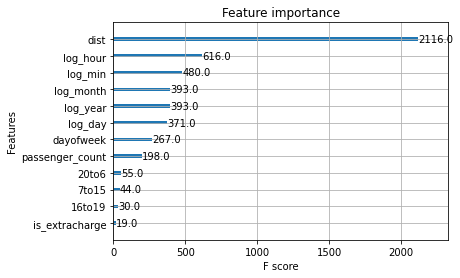

In [22]:
import matplotlib.pyplot as plt

plot_importance(model)

plt.show()

#### 1-3. 모델 평가 

In [13]:
y_pred = model.predict(x_valid)
y_true = y_valid

In [14]:
mae = mean_absolute_error(y_true, y_pred)
mae 

2.841833465608669

In [15]:
mse = mean_squared_error(y_true, y_pred)
mse

26.844044696898255

https://joyfuls.tistory.com/63

#### 1-4. 하이퍼파라미터 조정

- n_estimators (또는 num_boost_round) : 결정 트리 개수
- max_depth : 트리의 깊이
- colsample_bytree : 컬럼의 샘플링 비율
- subsample : weak learner가 학습에 사용하는 데이터 샘플링 비율
- learning_rate : 학습률
- min_split_loss : 리프 노드를 추가적으로 나눌지 결정하는 값
- reg_lambda : L2 규제
- reg_alpha : L1 규제

#### -> GridSearchCV 이용해 하이퍼 파라미터 튜닝

GridSearchCV 클래스의 생성자
- estimator : classifier, regressor, pipeline
- param_grid : 파라미터 딕셔너리 (파라미터명과 사용될 여러 파라미터 값을 지정)
- scoring : 예측 성능을 측정할 평가 방법. 보통은 사이킷런에서 제공하는 문자열 (예: ‘accuracy’)을 넣지만 별도의 함수도 직접 지정이 가능
- cv : 교차 검증을 위해 분할되는 폴드 수
- refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.

https://2-chae.github.io/category/1.ai/29

In [27]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

parameters = {'max_depth': [1,2,3], 'min_samples_split':[2,3]}

In [33]:
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

In [34]:
grid_dtree.fit(x_train, y_train)

c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError:

c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError:

c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError:

ValueError: Unknown label type: 'continuous'

https://daily-studyandwork.tistory.com/35

In [25]:
param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50],
                 'objective':['binary:logistic'],
                 'random_state':[2]}

In [ ]:
# 3번
cv=KFold(n_splits=6, random_state=1)

In [ ]:
# 4번
gcv=GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=4)

In [ ]:
# 5번
gcv.fit(train_X.values,train_Y.values)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

final params {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
best score 0.7618358747302295

https://m.blog.naver.com/gustn3964/221431933811

=======================================================================================================================

### 2. LightGBM

In [35]:
# !pip install lightgbm

In [29]:
import lightgbm as lgb

#### 2-1. 모델링

In [44]:
train_ds = lgb.Dataset(x_train, label=y_train)
test_ds = lgb.Dataset(x_valid, label=y_valid)
params = {'learning_rate':0.01,
          'max_depth':16,
         'boosting':'gbdt',
         'objective':'regression',
         'metric':'mse',
         'is_training_metric':True,
         'num_leaves':144,
         'feature_fraction':0.9,
         'bagging_fraction':0.7,
         'bagging_freq':5,
         'seed':2020}

In [45]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\users\jooya\appdata\local\programs\python\python38\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 14
[LightGBM] [Info] Start training from score 11.335730
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 38.0593
[200]	valid_0's l2: 29.238
[300]	valid_0's l2: 27.825
[400]	valid_0's l2: 27.5618
[500]	valid_0's l2: 27.508
[600]	valid_0's l2: 27.4956
[700]	valid_0's l2: 27.5175
Early stopping, best iteration is:
[603]	valid_0's l2: 27.4948


In [46]:
y_pred = model.predict(x_valid)

#### 2-2. 중요변수 시각화

#### 2-3. 모델 평가

In [47]:
y_true = y_valid

mae = mean_absolute_error(y_true, y_pred)
print(mae)

mse = mean_squared_error(y_true, y_pred)
print(mse)

2.857855733020886
27.49478194751611


#### 2-4. 하이퍼파라미터 조정

#### 주요 파라미터
- learning_rate
- num_iterations
- max_depth
- boosting
- bagging_fraction
- feature_fraction
- scale_pos_weight
- early_stopping_round
- lambda_l1, lambda_l2

#### 더 빠른 속도
- bagging_fraction
- max_bin 작게
- save_binary를 쓰면 데이터 로딩속도 빨라짐
- parallel learning 사용

#### 더 높은 정확도
- max_bin 크게
- num_iterations 크게하고, learning_rate은 작게
- num_leaves 크게 (과적합의 원인이 될 수 있음)
- boosting 알고리즘 'dart' 사용

#### 과적합 줄이기
- max_bin 작게
- num_leaves 작게
- min_data_in_leaf와 min_sum_hessian_in_leaf 사용하기

https://greatjoy.tistory.com/72m

=======================================================================================================================

### 3. Randomforest

In [ ]:
# 랜덤포레스트는 스케일링 필요

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
model = RandomForestRegressor()

#### 3-1. 모델링

In [13]:
model.fit(x_train, y_train)

RandomForestRegressor()

#### 3-2. 모델 평가

In [14]:
y_pred = model.predict(x_valid)
y_true = y_valid

mae = mean_absolute_error(y_true, y_pred)
print(mae)

mse = mean_squared_error(y_true, y_pred)
print(mse)

3.0250995289166673
28.471462701723805


https://creatorjo.tistory.com/142

#### 3-3. 하이퍼파라미터 조정

In [16]:
bag_forest_reg = RandomForestRegressor(n_estimators=100,
                                       criterion="mse",
                                       n_jobs=-1,
                                       random_state=1)

bag_forest_reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [17]:
train_pred_y = bag_forest_reg.predict(x_train)
test_pred_y = bag_forest_reg.predict(x_valid)

In [20]:
mse = mean_squared_error(y_valid, test_pred_y)
print(mse)

28.40661643261075


In [21]:
rf_reg = RandomForestRegressor(n_estimators=100,
                               criterion="mse",
                               max_features=6,
                               n_jobs=-1,
                               random_state=1)

rf_reg.fit(x_train, y_train)

RandomForestRegressor(max_features=6, n_jobs=-1, random_state=1)

In [23]:
train_pred_y = rf_reg.predict(x_train)
test_pred_y = rf_reg.predict(x_valid)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_valid, test_pred_y)}")

train_MAE = 1.1040105478928568
test_MAE = 2.9643777640833333


- sklearn의 GridSearchCV를 사용하여 매우 이해하기 쉬운 하이퍼 파라미터를 조정
- 주어진 하이퍼 파라미터의 모든 조합을 시도하고 
- K- 폴드 크로스 유효성 검사를 param_grid 사용하여 각 조합으로 모델 성능을 계산 

In [24]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}

In [25]:
rf_reg = RandomForestRegressor()

In [28]:
rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

In [ ]:
rf_reg_tuned.fit(x_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
rf_reg_tuned.best_estimator_

In [ ]:
# 최고의 Random Forest를 사용하여 기능 중요성을 측정

In [ ]:
rf_reg_best = rf_reg_tuned.best_estimator_

col_names = df.drop(columns=["PM2.5"]).columns
fi_df = pd.DataFrame(rf_reg_best.feature_importances_, index=col_names, columns=["Importance"])

fi_df.sort_values("Importance", ascending=False)

https://ichi.pro/ko/model-guchug-eseo-python-ui-haipeo-palamiteo-tyuningkkaji-random-forest-102306249189611

=======================================================================================================================

### 4. Ridge regression (릿지 회귀)

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge = Ridge()

In [54]:
ridge.fit(x_train, y_train)

Ridge()

In [56]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_valid, y_valid))

0.5592109175181625
0.5642664967096929


https://zara49.tistory.com/64

=======================================================================================================================

### 5. LASSO (라쏘)

In [57]:
from sklearn.linear_model import Lasso

In [58]:
lasso = Lasso()

In [59]:
lasso.fit(x_train, y_train)

Lasso()

In [60]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_valid, y_valid))

0.5592109175181625
0.5642664967096929


=======================================================================================================================

### * Catboost

In [61]:
import catboost as cb

In [64]:
# 학습 데이터를 Catboost 모델에 맞게 변환

cb_dtrain = cb.Pool(data=x_train, label=y_train)

In [65]:
cb_param = {'learning_rate':0.01}

In [66]:
# 학습 진행

cb_model = cb.train(pool=cb_dtrain, params=cb_param)

0:	learn: 9.7011096	total: 214ms	remaining: 3m 33s
1:	learn: 9.6369551	total: 274ms	remaining: 2m 16s
2:	learn: 9.5734828	total: 336ms	remaining: 1m 51s
3:	learn: 9.5110853	total: 397ms	remaining: 1m 38s
4:	learn: 9.4495626	total: 461ms	remaining: 1m 31s
5:	learn: 9.3888902	total: 516ms	remaining: 1m 25s
6:	learn: 9.3288635	total: 568ms	remaining: 1m 20s
7:	learn: 9.2697062	total: 624ms	remaining: 1m 17s
8:	learn: 9.2112048	total: 682ms	remaining: 1m 15s
9:	learn: 9.1535757	total: 744ms	remaining: 1m 13s
10:	learn: 9.0966013	total: 828ms	remaining: 1m 14s
11:	learn: 9.0403024	total: 920ms	remaining: 1m 15s
12:	learn: 8.9847665	total: 1s	remaining: 1m 16s
13:	learn: 8.9301121	total: 1.07s	remaining: 1m 15s
14:	learn: 8.8762742	total: 1.14s	remaining: 1m 15s
15:	learn: 8.8229443	total: 1.2s	remaining: 1m 14s
16:	learn: 8.7705914	total: 1.26s	remaining: 1m 13s
17:	learn: 8.7186203	total: 1.33s	remaining: 1m 12s
18:	learn: 8.6676477	total: 1.4s	remaining: 1m 12s
19:	learn: 8.6175417	total:

161:	learn: 5.6784500	total: 10.2s	remaining: 52.7s
162:	learn: 5.6733373	total: 10.3s	remaining: 52.6s
163:	learn: 5.6680982	total: 10.3s	remaining: 52.5s
164:	learn: 5.6630474	total: 10.4s	remaining: 52.5s
165:	learn: 5.6580934	total: 10.4s	remaining: 52.4s
166:	learn: 5.6531890	total: 10.5s	remaining: 52.3s
167:	learn: 5.6483545	total: 10.5s	remaining: 52.2s
168:	learn: 5.6436261	total: 10.6s	remaining: 52.2s
169:	learn: 5.6388616	total: 10.7s	remaining: 52.1s
170:	learn: 5.6343168	total: 10.7s	remaining: 52s
171:	learn: 5.6298817	total: 10.8s	remaining: 51.9s
172:	learn: 5.6253772	total: 10.8s	remaining: 51.8s
173:	learn: 5.6210384	total: 10.9s	remaining: 51.7s
174:	learn: 5.6168687	total: 11s	remaining: 51.6s
175:	learn: 5.6127129	total: 11s	remaining: 51.5s
176:	learn: 5.6084248	total: 11.1s	remaining: 51.4s
177:	learn: 5.6043743	total: 11.1s	remaining: 51.3s
178:	learn: 5.6003318	total: 11.2s	remaining: 51.2s
179:	learn: 5.5962969	total: 11.2s	remaining: 51.1s
180:	learn: 5.5924

320:	learn: 5.3685767	total: 19.8s	remaining: 41.9s
321:	learn: 5.3681006	total: 19.9s	remaining: 41.8s
322:	learn: 5.3674843	total: 19.9s	remaining: 41.7s
323:	learn: 5.3669479	total: 20s	remaining: 41.7s
324:	learn: 5.3664957	total: 20s	remaining: 41.6s
325:	learn: 5.3659925	total: 20.1s	remaining: 41.6s
326:	learn: 5.3655302	total: 20.2s	remaining: 41.5s
327:	learn: 5.3648926	total: 20.2s	remaining: 41.4s
328:	learn: 5.3644365	total: 20.3s	remaining: 41.4s
329:	learn: 5.3639206	total: 20.3s	remaining: 41.3s
330:	learn: 5.3633507	total: 20.4s	remaining: 41.2s
331:	learn: 5.3629213	total: 20.5s	remaining: 41.2s
332:	learn: 5.3624891	total: 20.5s	remaining: 41.1s
333:	learn: 5.3619375	total: 20.6s	remaining: 41.1s
334:	learn: 5.3615594	total: 20.7s	remaining: 41s
335:	learn: 5.3611405	total: 20.7s	remaining: 40.9s
336:	learn: 5.3606172	total: 20.8s	remaining: 40.9s
337:	learn: 5.3601453	total: 20.8s	remaining: 40.8s
338:	learn: 5.3596206	total: 20.9s	remaining: 40.7s
339:	learn: 5.3592

481:	learn: 5.3200474	total: 30.2s	remaining: 32.5s
482:	learn: 5.3198696	total: 30.3s	remaining: 32.4s
483:	learn: 5.3196938	total: 30.3s	remaining: 32.3s
484:	learn: 5.3195016	total: 30.4s	remaining: 32.3s
485:	learn: 5.3192857	total: 30.5s	remaining: 32.2s
486:	learn: 5.3191253	total: 30.5s	remaining: 32.1s
487:	learn: 5.3189429	total: 30.6s	remaining: 32.1s
488:	learn: 5.3187907	total: 30.6s	remaining: 32s
489:	learn: 5.3186690	total: 30.7s	remaining: 32s
490:	learn: 5.3185198	total: 30.8s	remaining: 31.9s
491:	learn: 5.3183160	total: 30.8s	remaining: 31.8s
492:	learn: 5.3181124	total: 30.9s	remaining: 31.8s
493:	learn: 5.3179442	total: 30.9s	remaining: 31.7s
494:	learn: 5.3177855	total: 31s	remaining: 31.6s
495:	learn: 5.3176332	total: 31.1s	remaining: 31.6s
496:	learn: 5.3174904	total: 31.1s	remaining: 31.5s
497:	learn: 5.3173197	total: 31.2s	remaining: 31.5s
498:	learn: 5.3171181	total: 31.3s	remaining: 31.4s
499:	learn: 5.3169656	total: 31.3s	remaining: 31.3s
500:	learn: 5.3168

641:	learn: 5.2985001	total: 41.8s	remaining: 23.3s
642:	learn: 5.2984191	total: 41.9s	remaining: 23.2s
643:	learn: 5.2982528	total: 41.9s	remaining: 23.2s
644:	learn: 5.2981664	total: 42s	remaining: 23.1s
645:	learn: 5.2981085	total: 42.1s	remaining: 23.1s
646:	learn: 5.2980278	total: 42.1s	remaining: 23s
647:	learn: 5.2979162	total: 42.2s	remaining: 22.9s
648:	learn: 5.2977996	total: 42.3s	remaining: 22.9s
649:	learn: 5.2977270	total: 42.3s	remaining: 22.8s
650:	learn: 5.2975864	total: 42.4s	remaining: 22.7s
651:	learn: 5.2974486	total: 42.5s	remaining: 22.7s
652:	learn: 5.2973656	total: 42.6s	remaining: 22.6s
653:	learn: 5.2972705	total: 42.6s	remaining: 22.6s
654:	learn: 5.2971821	total: 42.7s	remaining: 22.5s
655:	learn: 5.2971056	total: 42.8s	remaining: 22.4s
656:	learn: 5.2970279	total: 42.8s	remaining: 22.4s
657:	learn: 5.2969666	total: 42.9s	remaining: 22.3s
658:	learn: 5.2968381	total: 43s	remaining: 22.2s
659:	learn: 5.2967485	total: 43.1s	remaining: 22.2s
660:	learn: 5.2966

802:	learn: 5.2844131	total: 54.3s	remaining: 13.3s
803:	learn: 5.2843550	total: 54.4s	remaining: 13.3s
804:	learn: 5.2842496	total: 54.5s	remaining: 13.2s
805:	learn: 5.2841471	total: 54.6s	remaining: 13.1s
806:	learn: 5.2840880	total: 54.6s	remaining: 13.1s
807:	learn: 5.2840430	total: 54.7s	remaining: 13s
808:	learn: 5.2839940	total: 54.8s	remaining: 12.9s
809:	learn: 5.2839530	total: 54.9s	remaining: 12.9s
810:	learn: 5.2839054	total: 54.9s	remaining: 12.8s
811:	learn: 5.2838027	total: 55s	remaining: 12.7s
812:	learn: 5.2836146	total: 55.1s	remaining: 12.7s
813:	learn: 5.2835602	total: 55.1s	remaining: 12.6s
814:	learn: 5.2834923	total: 55.2s	remaining: 12.5s
815:	learn: 5.2834504	total: 55.3s	remaining: 12.5s
816:	learn: 5.2834007	total: 55.3s	remaining: 12.4s
817:	learn: 5.2833443	total: 55.4s	remaining: 12.3s
818:	learn: 5.2832854	total: 55.5s	remaining: 12.3s
819:	learn: 5.2831996	total: 55.6s	remaining: 12.2s
820:	learn: 5.2831224	total: 55.7s	remaining: 12.2s
821:	learn: 5.28

962:	learn: 5.2744316	total: 1m 6s	remaining: 2.55s
963:	learn: 5.2742617	total: 1m 6s	remaining: 2.48s
964:	learn: 5.2741856	total: 1m 6s	remaining: 2.41s
965:	learn: 5.2741465	total: 1m 6s	remaining: 2.34s
966:	learn: 5.2741150	total: 1m 6s	remaining: 2.27s
967:	learn: 5.2740765	total: 1m 6s	remaining: 2.21s
968:	learn: 5.2740145	total: 1m 6s	remaining: 2.14s
969:	learn: 5.2739630	total: 1m 6s	remaining: 2.07s
970:	learn: 5.2739242	total: 1m 6s	remaining: 2s
971:	learn: 5.2738468	total: 1m 7s	remaining: 1.93s
972:	learn: 5.2738166	total: 1m 7s	remaining: 1.86s
973:	learn: 5.2737630	total: 1m 7s	remaining: 1.79s
974:	learn: 5.2737001	total: 1m 7s	remaining: 1.72s
975:	learn: 5.2736071	total: 1m 7s	remaining: 1.66s
976:	learn: 5.2735657	total: 1m 7s	remaining: 1.59s
977:	learn: 5.2734884	total: 1m 7s	remaining: 1.52s
978:	learn: 5.2734363	total: 1m 7s	remaining: 1.45s
979:	learn: 5.2733621	total: 1m 7s	remaining: 1.38s
980:	learn: 5.2732879	total: 1m 7s	remaining: 1.31s
981:	learn: 5.2

In [68]:
import numpy as np

In [69]:
# 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1

cb_model_predict = np.argmax(cb_model.predict(x_valid), axis=1)+1

AxisError: axis 1 is out of bounds for array of dimension 1

In [71]:
print("Accuracy: %.2f" %(accuracy_score(y_valid, cb_model_predict)*100))  # 정확도 % 계산
print("Time: %.2f" %(time.time() - start), "seconds")  # 코드 실행 시간 계산

NameError: name 'accuracy_score' is not defined

https://blog.naver.com/jaehong7719/221951766987

=======================================================================================================================

### 1. 하이퍼파라미터 조정
- randomsearch 반복 수 적게
- gridsearch 파라미터 적게

#### > 시간 없으면 둘 중 하나만 해보기

### 2. 평가지표
- rmse/mse 둘 중 하나로
- log_loss